# 1. Data processing 

In [279]:
# Import needed moduls

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [280]:
# Load data

titanic_train = pd.read_csv("../data/titanic/train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [281]:
# Delete no needed (for my opinion) columns

titanic_train.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


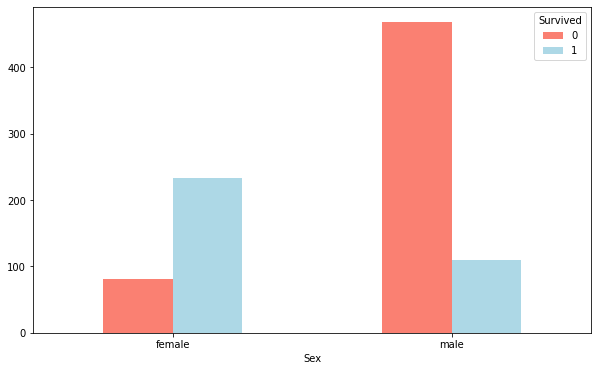

In [282]:
pd.crosstab(titanic_train['Sex'], titanic_train['Survived']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);
print(titanic_train.groupby(['Sex'])['Survived'].mean()*100)
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


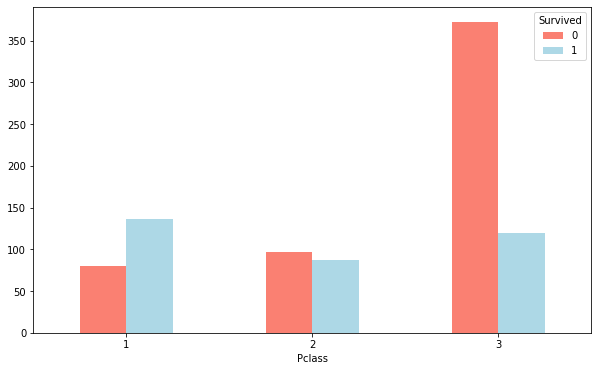

In [283]:
pd.crosstab(titanic_train['Pclass'], titanic_train['Survived']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);

print(titanic_train.groupby(['Pclass'])['Survived'].mean()*100)
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64


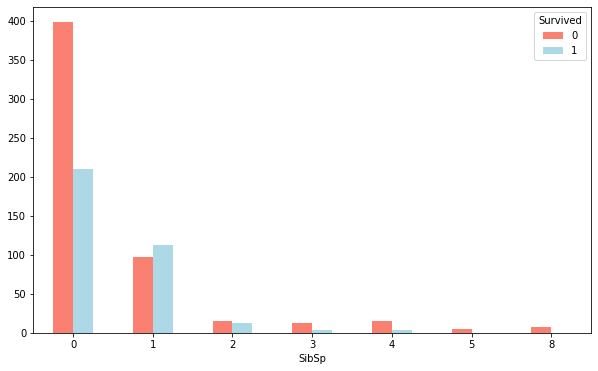

In [284]:
pd.crosstab(titanic_train['SibSp'], titanic_train['Survived']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);

print(titanic_train.groupby(['SibSp'])['Survived'].mean()*100)
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64


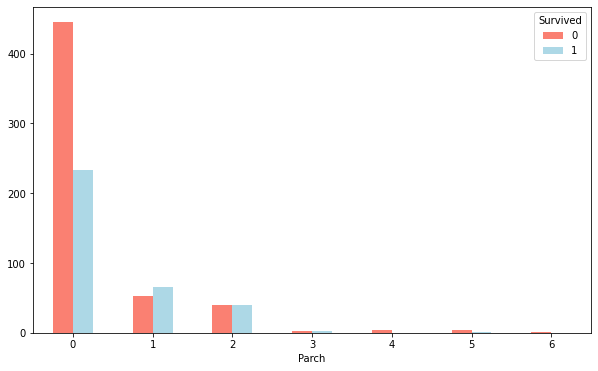

In [285]:
pd.crosstab(titanic_train['Parch'], titanic_train['Survived']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);

print(titanic_train.groupby(['Parch'])['Survived'].mean()*100)
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

In [286]:
# Check the data to find gaps

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [287]:
# Fill "Age" column nones by mean value

titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

# No split data for Train and test yet, and I know that necessary 
# to filling gaps each sample differently (mean() at least)

# Check result and other gaps

print(titanic_train["Age"].isna().sum())
titanic_train.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [288]:
# Check mode for object column to fill gaps
# Fill gaps and check result

titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0], inplace=True)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [289]:
titanic_train[""] = titanic_train["Age"].map(lambda x: int(x < 25))
titanic_train["Old"] = titanic_train["Age"].map(lambda x: int(x > 45))
titanic_train["Med"] = titanic_train["Age"].map(lambda x: int(x <= 45 and x >= 25))

titanic_train["Big_family"] = ((titanic_train["SibSp"] == 0) | \
                               (titanic_train["SibSp"] >= 3) | \
                               (titanic_train["Parch"] > 3)).astype('int32')
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Young,Old,Med,Big_family
0,0,3,male,22.0,1,0,7.2500,S,1,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,1


In [290]:
# Check resulting dataframe

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   Young       891 non-null    int64  
 9   Old         891 non-null    int64  
 10  Med         891 non-null    int64  
 11  Big_family  891 non-null    int32  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 80.2+ KB


In [291]:
# Converting categorical string feature to binominal integer

titanic_train["Sex"] = titanic_train["Sex"].apply(lambda x: 1 if x=="male" else 0)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Young,Old,Med,Big_family
0,0,3,1,22.0,1,0,7.2500,S,1,0,0,0
1,1,1,0,38.0,1,0,71.2833,C,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,1,1
3,1,1,0,35.0,1,0,53.1000,S,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,1,1


In [292]:
# Normalization
# If will be used machine learning algorithms are sensitive to feature scaling

# from sklearn.preprocessing import minmax_scale

# titanic_train[["Age", "Fare"]] = minmax_scale(titanic_train[["Age", "Fare"]])
# titanic_train.head()

In [293]:
# Convert categorical features to few binominal

titanic_train = pd.concat([titanic_train, 
                           pd.get_dummies(titanic_train["Pclass"], prefix='Class'),
                           pd.get_dummies(titanic_train["Embarked"], prefix='Embarked')],
                           axis=1)
titanic_train.drop(["Embarked", "Pclass", "Age"], axis=1, inplace=True)


In [294]:
# Check final view dataframe befor data spliting and fitting model

titanic_train.head()

,Survived,Sex,SibSp,Parch,Fare,Young,Old,Med,Big_family,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,0,7.2500,1,0,0,0,0,0,1,0,0,1
1,1,0,1,0,71.2833,0,0,1,0,1,0,0,1,0,0
2,1,0,0,0,7.9250,0,0,1,1,0,0,1,0,0,1
3,1,0,1,0,53.1000,0,0,1,0,1,0,0,0,0,1
4,0,1,0,0,8.0500,0,0,1,1,0,0,1,0,0,1


# 2. Choose and train model

In [295]:
# Splitting the dataset on training and testing

from sklearn.model_selection import train_test_split

X = titanic_train.drop("Survived", axis=1)
y = titanic_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [297]:
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary called results
results = {}

In [298]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

# View the results
results

d:\python_projects\jupiter\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\python_projects\jupiter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.7932960893854749,
 'KNN': 0.7597765363128491,
 'SVC': 0.6536312849162011,
 'LogisticRegression': 0.7932960893854749,
 'RandomForestClassifier': 0.776536312849162}

Accuracy of our model with standard parameters is ~ **81%**

# 3. Experiments with model hyperparams

In [299]:
from sklearn.model_selection import GridSearchCV

In [300]:
param_RFC = {'n_estimators': [i for i in range(1, 121, 10)],
             'max_depth': [i for i in range(1, 31, 2)]}

# Setup the grid search
grid_RFC = GridSearchCV(RandomForestClassifier(random_state=42, ),
                    param_RFC,
                    cv=5)

# Fit the grid search to the data
grid_RFC.fit(X_train, y_train)

# Find the best parameters
grid_RFC.best_params_, grid_RFC.best_score_

({'max_depth': 7, 'n_estimators': 11}, 0.8118093174431202)

In [301]:
grid_RFC.best_estimator_.fit(X_train, y_train)
grid_RFC.best_estimator_.score(X_test, y_test)

0.8044692737430168

In [302]:
param_LR = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C': [10**(i-2) for i in range(1, 5, 1)],
            'solver': ['lbfgs', 'liblinear']}

# Setup the grid search
grid_LR = GridSearchCV(LogisticRegression(),
                    param_LR,
                    cv=5)

# Fit the grid search to the data
grid_LR.fit(X_train, y_train)

# Find the best parameters
grid_LR.best_params_, grid_LR.best_score_

d:\python_projects\jupiter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python_projects\jupiter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

d:\python_projects\jupiter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python_projects\jupiter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\python_projects\jupiter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.o

({'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.8019403132079189)

In [303]:
grid_LR.best_estimator_.fit(X_train, y_train)
grid_LR.best_estimator_.score(X_test, y_test)

0.7877094972067039

In [304]:
param_knn = {'n_neighbors': [5, 7, 8, 9, 10, 12, 15, 20],
              'weights': ['uniform', 'distance'],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Setup the grid search
grid_knn = GridSearchCV(KNeighborsClassifier(),
                    param_knn,
                    cv=5)

# Fit the grid search to the data
grid_knn.fit(X_train, y_train)

# Find the best parameters
grid_knn.best_params_, grid_knn.best_score_

({'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'},
 0.7556387274697134)

In [305]:
grid_knn.best_estimator_.fit(X_train, y_train)
grid_knn.best_estimator_.score(X_test, y_test)

0.7821229050279329

In [306]:
# Fitting the best model and check score

model = RandomForestClassifier(n_estimators=61, max_depth=6, random_state=42).fit(X_train, y_train)

round(model.score(X_test, y_test) * 100,2)

80.45

In [307]:
from sklearn.model_selection import cross_val_score

print(f"Accuracy {np.mean(cross_val_score(model, X, y, cv=5, scoring='accuracy'))}")
print(f"Recall {np.mean(cross_val_score(model, X, y, cv=5, scoring='recall'))}")
print(f"Precision {np.mean(cross_val_score(model, X, y, cv=5, scoring='precision'))}")
print(f"F1 {np.mean(cross_val_score(model, X, y, cv=5, scoring='f1'))}")

Accuracy 0.8137467830016949
Recall 0.64923273657289
Precision 0.8293980016085278
F1 0.7279491871649822


In [308]:
# Load the test and valid data

titanic_test = pd.read_csv("../data/titanic/test.csv")
y_valid = pd.read_csv("../data/titanic/gender_submission.csv", index_col = 0).squeeze("columns")
titanic_test.head()

# Same transformations as on train dataset

# Delete no needed (for my opinion) columns
titanic_test.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Fill "Age" and "Fare"column nones by mean value
titanic_test["Age"].fillna(titanic_test["Age"].mean(), inplace=True)
titanic_test["Fare"].fillna(titanic_test["Fare"].mean(), inplace=True)

# Fill "Embarked" column nones by mode value
titanic_test["Embarked"].fillna(titanic_test["Embarked"].mode()[0], inplace=True)

# Converting categorical string feature to binominal integer
titanic_test["Sex"] = titanic_test["Sex"].apply(lambda x: 1 if x=="male" else 0)

# New features
titanic_test["Young"] = titanic_test["Age"].map(lambda x: int(x < 25))
titanic_test["Old"] = titanic_test["Age"].map(lambda x: int(x > 45))
titanic_test["Med"] = titanic_test["Age"].map(lambda x: int(x <= 45 and x >= 25))

titanic_test["Big_family"] = ((titanic_test["SibSp"] == 0) | \
                               (titanic_test["SibSp"] >= 3) | \
                               (titanic_test["Parch"] > 3)).astype('int32')

# Convert categorical features to few binominal
titanic_test = pd.concat([titanic_test, 
                           pd.get_dummies(titanic_test["Pclass"], prefix='Class'),
                           pd.get_dummies(titanic_test["Embarked"], prefix='Embarked')],
                           axis=1)

titanic_test.drop(["Embarked", "Pclass", "Age"], axis=1, inplace=True)

titanic_test.head()

,Sex,SibSp,Parch,Fare,Young,Old,Med,Big_family,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,7.8292,0,0,1,1,0,0,1,0,1,0
1,0,1,0,7.0000,0,1,0,0,0,0,1,0,0,1
2,1,0,0,9.6875,0,1,0,1,0,1,0,0,1,0
3,1,0,0,8.6625,0,0,1,1,0,0,1,0,0,1
4,0,1,1,12.2875,1,0,0,0,0,0,1,0,0,1


Accuracy of our model tuned model is almost **85%**. 
Greate!!!

In [309]:
# Create resulting dataframe with predictions

result_predictions = pd.DataFrame({"PassengerId":np.arange(892, 1310),
                                   "Survived" : model.predict(titanic_test)})
result_predictions

# Save result to csv file

result_predictions.to_csv("../data/titanic/my_second2_predictions.csv", index=False)